In [4]:
import pandas as pd
import numpy as np


Time         2020-03-31               2020-06-30               2020-09-30  \
Region              USA Mexico Canada        USA Mexico Canada        USA   
Product                                                                     
TV                  567    770    620        439    178    353        971   
PC                  566    310    545        546    935    180        507   
Game Console        774    744    850        703    868    223        677   

Time                       2020-12-31  ... 2023-03-31 2023-06-30         \
Region       Mexico Canada        USA  ...     Canada        USA Mexico   
Product                                ...                                
TV              929    894        685  ...        800        178    584   
PC              523    767        412  ...        307        482    188   
Game Console    631    694        862  ...        917        827    872   

Time                2023-09-30               2023-12-31                
Region       C

/var/folders/m0/wj79nd7n7_j03g4gcc4pdlnc0000gn/T/ipykernel_31482/3050824099.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  time_periods = pd.date_range(start='2020-01-01', end='2023-12-31', freq='Q')
/var/folders/m0/wj79nd7n7_j03g4gcc4pdlnc0000gn/T/ipykernel_31482/3050824099.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


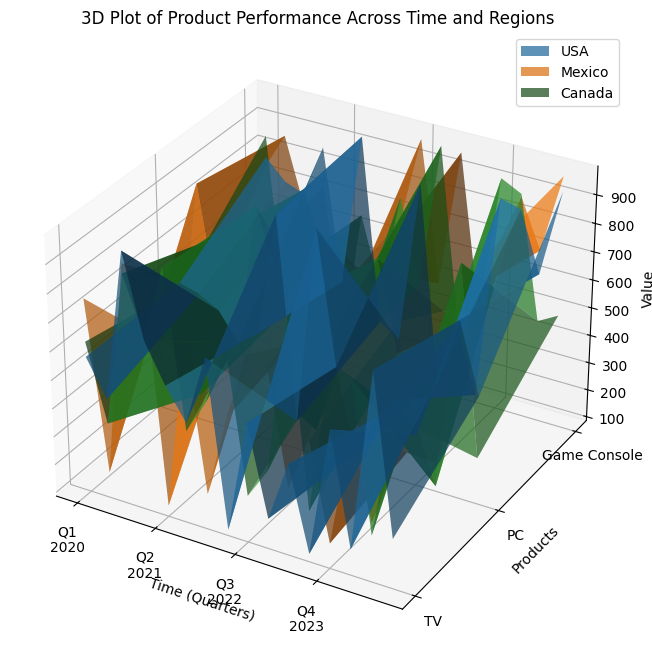

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Define the dimensions
products = ['TV', 'PC', 'Game Console']
time_periods = pd.date_range(start='2020-01-01', end='2023-12-31', freq='Q')
regions = ['USA', 'Mexico', 'Canada']

# Create a random data array
data = np.random.randint(100, 1000, size=(len(products), len(time_periods), len(regions)))

# Create the multidimensional DataFrame
df = pd.DataFrame(
    data.reshape(len(products), len(time_periods) * len(regions)),
    index=pd.Index(products, name='Product'),
    columns=pd.MultiIndex.from_product([time_periods, regions], names=['Time', 'Region'])
)

# Display the first few rows of the DataFrame
print(df.head())

# Create the multidimensional DataFrame
df = pd.DataFrame(
    data.reshape(len(products), len(time_periods) * len(regions)),
    index=pd.Index(products, name='Product'),
    columns=pd.MultiIndex.from_product([time_periods, regions], names=['Time', 'Region'])
)

# Display the first few rows of the DataFrame
print(df.head())

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare data for plotting
X, Y = np.meshgrid(range(len(time_periods)), range(len(products)))
for i, region in enumerate(regions):
    Z = df.loc[:, (slice(None), region)].values
    ax.plot_surface(X, Y, Z, label=region, alpha=0.7)

# Customize the plot
ax.set_xlabel('Time (Quarters)')
ax.set_ylabel('Products')
ax.set_zlabel('Value')
ax.set_title('3D Plot of Product Performance Across Time and Regions')

# Set custom tick labels
ax.set_xticks(range(0, len(time_periods), 4))
ax.set_xticklabels([f'Q{i+1}\n{year}' for i, year in enumerate(range(2020, 2024))])
ax.set_yticks(range(len(products)))
ax.set_yticklabels(products)

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()